In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from iqa_interpolator import IQA_Interpolator 

In [2]:
reports = []
for i in range(1,9):
    reports.append(pd.read_excel(f'relatorios/relatorio{i}.xlsx', decimal=','))
df = pd.concat(reports)
df['Data Coleta'] = pd.to_datetime(df['Data Coleta'], format='%d/%m/%Y')
df.head()

,Período DE,Período ATE,Cod_Interaguas,Tipo Rede,UGRHI,Código Ponto,Status Ponto,Data Coleta,Hora Coleta,Parametro,...,CLASSE,Município,UF,Inicio Operação,Fim Operação,Latitude,Longitude,Altitude,Localização,Captação
0,01/01/2001,01/01/2006,116,Rede Básica,06 - ALTO TIÊTE,TIET04150,Ativo,2001-01-11,09:25,Coliformes Termotolerantes,...,Classe 4,GUARULHOS,SP,01/01/1976,NaN,23 28 36,46 29 59,700,"Ponte na Rod. Ayrton Senna, a montante do Parq...",N
1,01/01/2001,01/01/2006,116,Rede Básica,06 - ALTO TIÊTE,TIET04150,Ativo,2001-03-27,10:25,Coliformes Termotolerantes,...,Classe 4,GUARULHOS,SP,01/01/1976,NaN,23 28 36,46 29 59,700,"Ponte na Rod. Ayrton Senna, a montante do Parq...",N
2,01/01/2001,01/01/2006,116,Rede Básica,06 - ALTO TIÊTE,TIET04150,Ativo,2001-05-30,09:40,Coliformes Termotolerantes,...,Classe 4,GUARULHOS,SP,01/01/1976,NaN,23 28 36,46 29 59,700,"Ponte na Rod. Ayrton Senna, a montante do Parq...",N
3,01/01/2001,01/01/2006,116,Rede Básica,06 - ALTO TIÊTE,TIET04150,Ativo,2001-07-25,09:35,Coliformes Termotolerantes,...,Classe 4,GUARULHOS,SP,01/01/1976,NaN,23 28 36,46 29 59,700,"Ponte na Rod. Ayrton Senna, a montante do Parq...",N
4,01/01/2001,01/01/2006,116,Rede Básica,06 - ALTO TIÊTE,TIET04150,Ativo,2001-09-18,09:50,Coliformes Termotolerantes,...,Classe 4,GUARULHOS,SP,01/01/1976,NaN,23 28 36,46 29 59,700,"Ponte na Rod. Ayrton Senna, a montante do Parq...",N


In [3]:
# print(df.columns)
print(list(df.Parametro.value_counts().index))

['Cloreto Total', 'Nitrogênio Amoniacal', 'Fósforo Total', 'Sólido Total', 'Manganês Total', 'Temperatura da Água', 'Subst. Tensoat. reagem c/ Azul Metileno', 'pH', 'Coloração', 'Chuvas nas últimas 24h', 'Nitrogênio-Nitrato', 'Nitrogênio-Nitrito', 'DBO (5, 20)', 'Turbidez', 'Temperatura do Ar', 'Zinco Total', 'Fenóis Totais', 'Oxigênio Dissolvido', 'Níquel Total', 'Nitrogênio Kjeldahl', 'Mercúrio Total', 'Sólido Dissolvido Total', 'Cobre Total', 'Ferro Total', 'Chumbo Total', 'Coliformes Termotolerantes', 'Condutividade', 'DQO', 'Crômio Total', 'Cádmio Total', 'Bário Total', 'Coliformes Totais - TTM', 'Alumínio Total', 'Ferro Dissolvido', 'Cobre Dissolvido', 'Alumínio Dissolvido', 'Carbono Orgânico Total', 'Arsênio Total', 'Sulfato Total', 'Potássio', 'Sódio', 'Ens. Ecotoxic. c/ Vibrio fischeri', 'Óleos e Graxas', 'Sólido Volátil Total', 'Escherichia coli**', 'Tolueno', 'm,p-Xileno', 'o-Xileno', 'Estireno', 'Etilbenzeno', 'Benzeno', 'Carbono Orgânico Dissolvido', 'Sólido Suspenso Total

In [4]:
droppers = ['Cod_Interaguas', 'Tipo Rede', 'Código Ponto', 'Status Ponto', 'Hora Coleta', 'UGRHI', 'Município', 'UF', 'CLASSE', 'Sistema Hídrico', 'Tipo de Sistema Hídrico', 'Localização', 'Captação', 'Altitude', 'Latitude', 'Longitude', 'Inicio Operação', 'Fim Operação']
parametrosRelevantes = ['pH', 'Temperatura da Água', 'Sólido Dissolvido Total', 'Oxigênio Dissolvido', 'Turbidez', 'Nitrogênio-Nitrito', 'Nitrogênio-Nitrato', 'Nitrogênio Kjeldahl', 'Fósforo Total', 'DBO (5, 20)', 'Coliformes Termotolerantes', 'Temperatura do Ar']
dfFiltered = df.drop(droppers, axis=1)
dfParameters = dfFiltered[dfFiltered['Parametro'].isin(parametrosRelevantes)].reset_index() 
dfParameters.sort_values(by='Data Coleta', inplace=True)

In [5]:
parametersDfs={}

for parameter in parametrosRelevantes:
    parametersDfs[parameter] = dfParameters[dfParameters['Parametro']==parameter].reset_index()
    if parameter != 'Coloração':
        parametersDfs[parameter]['Valor'] = pd.to_numeric(parametersDfs[parameter]['Valor']) 


In [6]:
dfParameters

,index,Período DE,Período ATE,Data Coleta,Parametro,Sinal,Valor,Unidade,Tipo Parâmetro
2913,1403,01/01/1981,01/01/1986,1981-01-05,Nitrogênio-Nitrato,NaN,0.16000000,mg/L,3- Químicos
2859,1349,01/01/1981,01/01/1986,1981-01-05,Nitrogênio-Nitrito,NaN,0.02000000,mg/L,3- Químicos
2805,1295,01/01/1981,01/01/1986,1981-01-05,Nitrogênio Kjeldahl,NaN,1.60000000,mg/L,3- Químicos
2643,1019,01/01/1981,01/01/1986,1981-01-05,Temperatura da Água,NaN,25.00000000,ºC,2- Físicos
2697,1073,01/01/1981,01/01/1986,1981-01-05,Temperatura do Ar,NaN,28.00000000,ºC,1- Campo
...,...,...,...,...,...,...,...,...,...
1303,1240,01/01/2016,01/01/2021,2020-10-05,Turbidez,NaN,42.00000000,UNT,2- Físicos
1302,1228,01/01/2016,01/01/2021,2020-10-05,Temperatura do Ar,NaN,32.20000000,ºC,1- Campo
1301,1227,01/01/2016,01/01/2021,2020-10-05,pH,NaN,7.70000000,U.pH,3- Químicos
1300,1226,01/01/2016,01/01/2021,2020-10-05,Temperatura da Água,NaN,25.10000000,ºC,2- Físicos


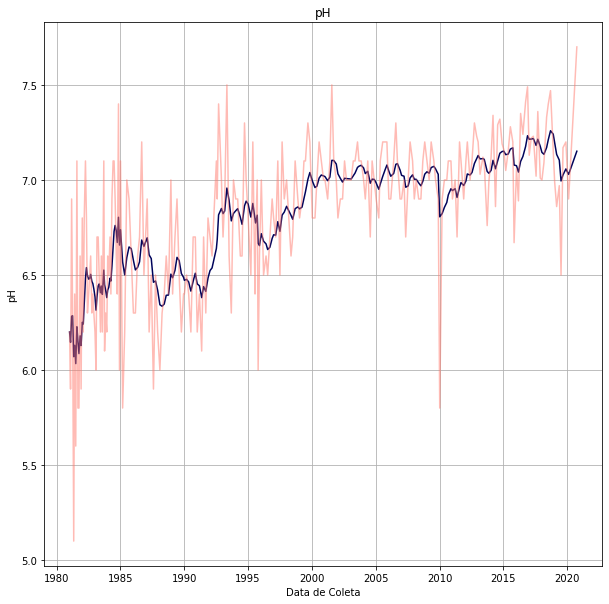

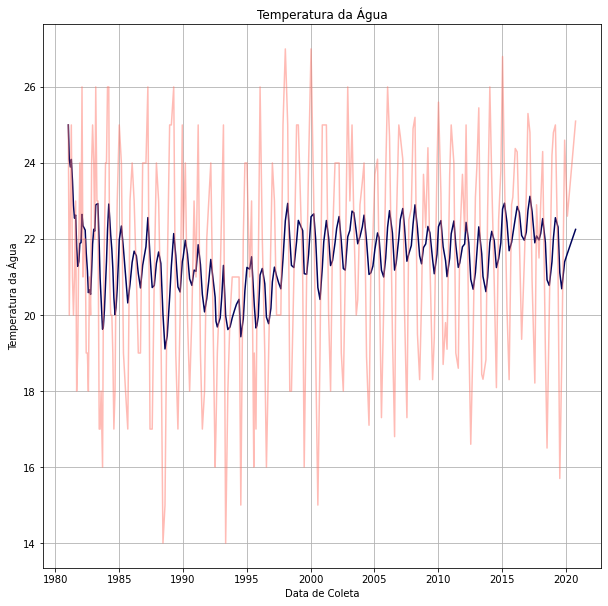

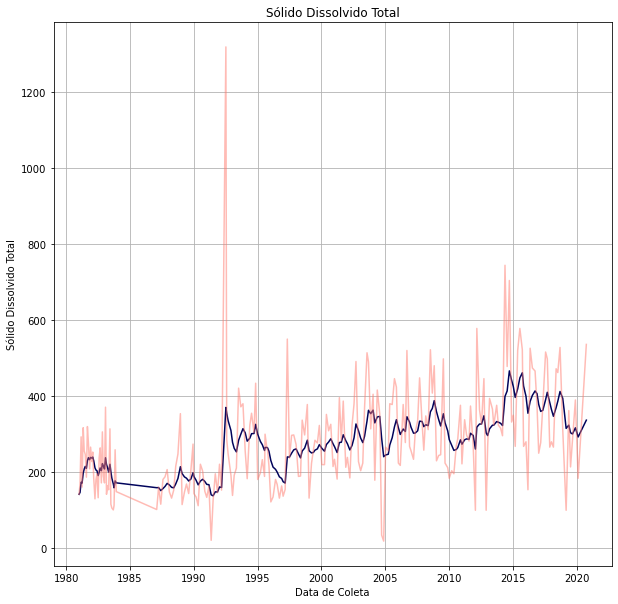

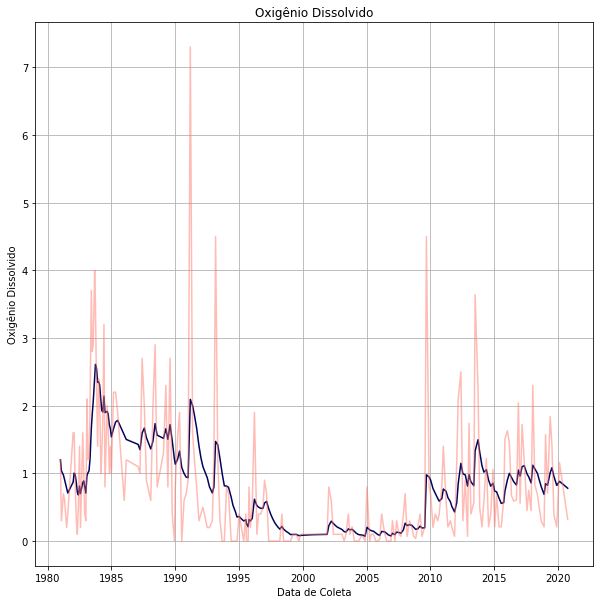

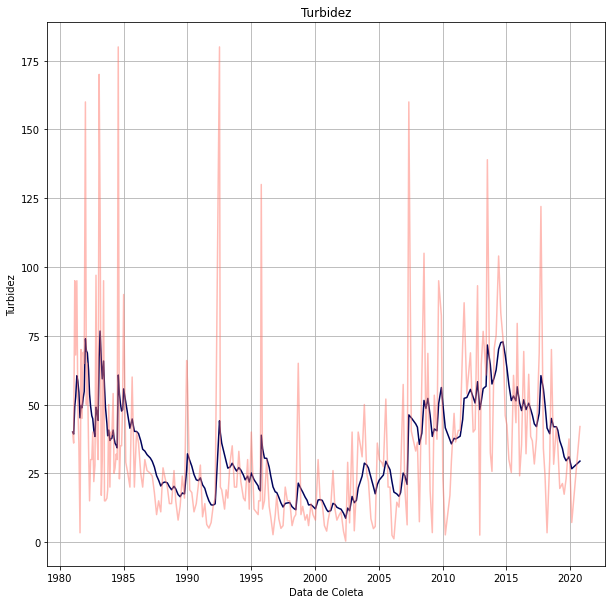

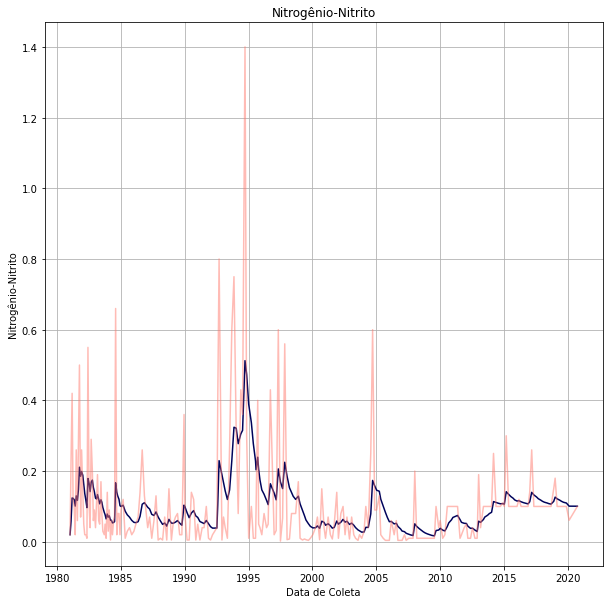

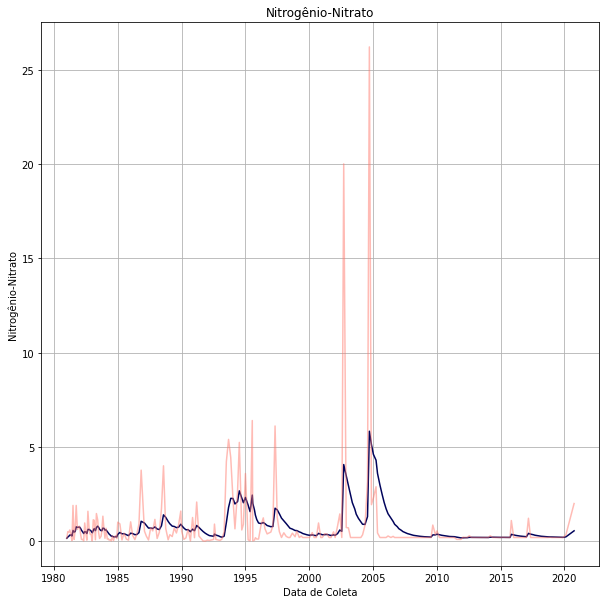

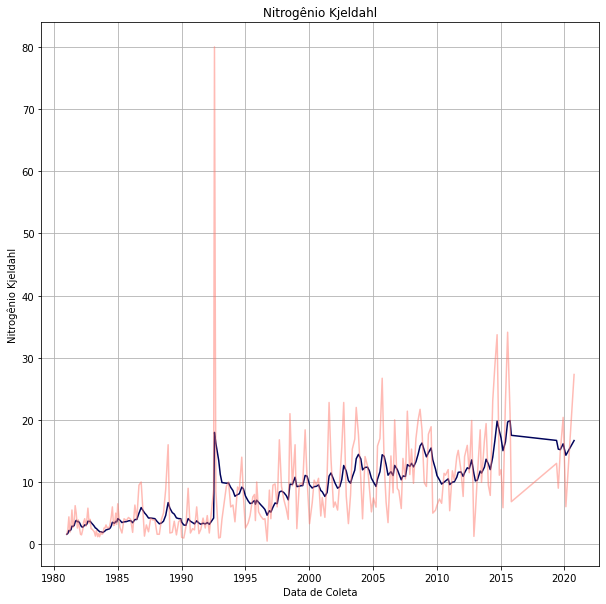

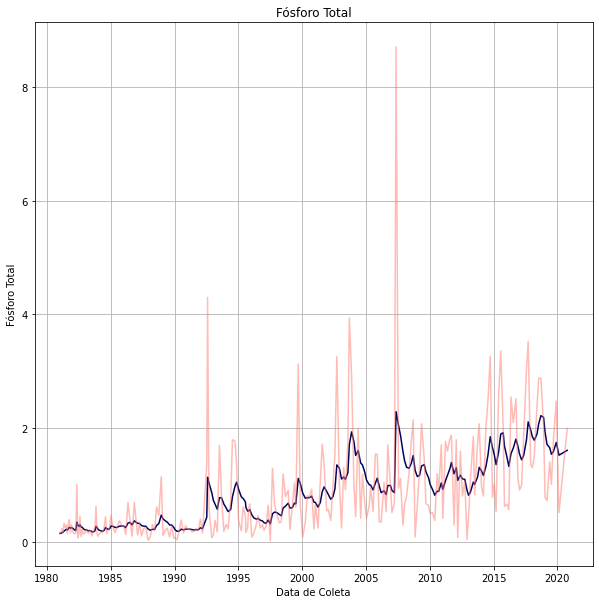

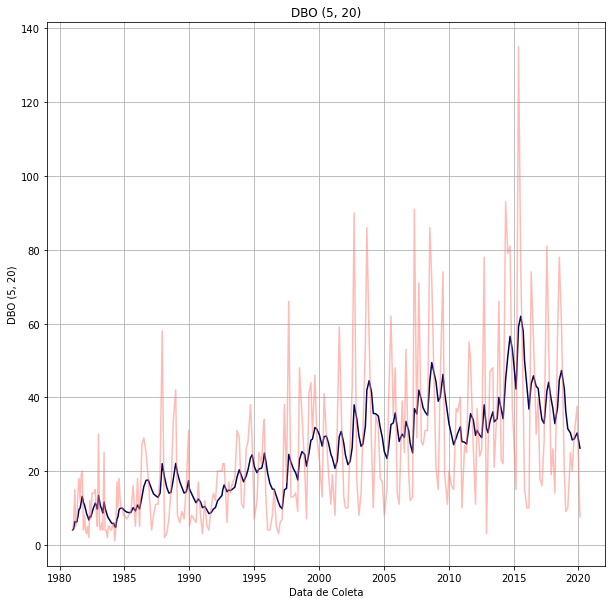

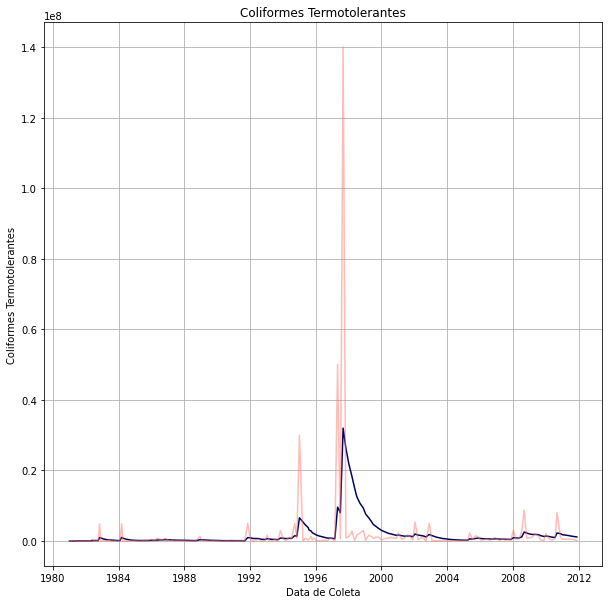

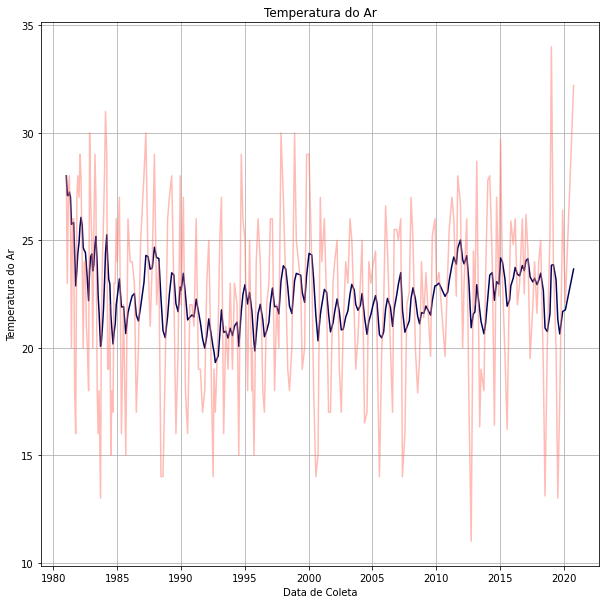

In [7]:
i = 0
for parameter in parametrosRelevantes:
    if parameter != 'Coloração':
        serie = parametersDfs[parameter]
        serieValor = serie['Valor'].ewm(span=10, adjust=False).mean()
        serieValorRaw = serie['Valor']
        plt.figure(figsize=(10,10))
        plt.grid(True)
        plt.plot(serie['Data Coleta'], serieValor, c='#00035b')
        plt.plot(serie['Data Coleta'], serieValorRaw, c='#ff796c', alpha=0.5)
        plt.title(parameter)
        plt.xlabel("Data de Coleta")
        plt.ylabel(parameter)
        plt.savefig(f'plots/{i}.png')
        i += 1

In [8]:
lista = list(dfParameters['Data Coleta'])
listaUnica = []
for data in lista:
    if data not in listaUnica:
        listaUnica.append(data)

In [10]:
Interpolator = IQA_Interpolator()
IQA_Dictionary = {}
coletas=[]
for data in listaUnica:
    coleta = dfParameters[dfParameters['Data Coleta'] == data]
    for key in parametrosRelevantes:
        if key in list(coleta['Parametro']):
            IQA_Dictionary[key] = float(pd.to_numeric(coleta[coleta['Parametro'] == key]['Valor']))
    coletas.append([data, IQA_Dictionary.copy()])
coletas = np.array(coletas)


In [27]:
df_parametrosNoTempo = pd.DataFrame(coletas)
for k in coletas[0][1].keys():
    lista_k = []
    for i in df_parametrosNoTempo[1]:
        lista_k.append(i[k])
    df_parametrosNoTempo[k] = lista_k
df_parametrosNoTempo.drop(labels=1, axis=1, inplace=True)
df_parametrosNoTempo.rename({0:'Data'},axis=1,inplace=True)
df_parametrosNoTempo['CapacidadeO2'] = df_parametrosNoTempo['Temperatura da Água'].apply(Interpolator.getMaxSolubility)
df_parametrosNoTempo['pctO2'] = df_parametrosNoTempo['Oxigênio Dissolvido']/df_parametrosNoTempo['CapacidadeO2']*100
df_parametrosNoTempo['Nitrogênio Total'] = df_parametrosNoTempo['Nitrogênio Kjeldahl'] + df_parametrosNoTempo['Nitrogênio-Nitrato'] + df_parametrosNoTempo['Nitrogênio-Nitrito']
df_parametrosNoTempo['Temperatura'] = df_parametrosNoTempo['Temperatura da Água'] - df_parametrosNoTempo['Temperatura do Ar'] 
df_parametrosNoTempo.drop(labels=['Nitrogênio-Nitrito', 'Nitrogênio-Nitrato', 'Nitrogênio Kjeldahl', 'Temperatura do Ar', 'Temperatura da Água', 'CapacidadeO2'], axis=1, inplace=True)
df_parametrosNoTempo = df_parametrosNoTempo.set_index("Data")
df_parametrosNoTempo

,pH,Sólido Dissolvido Total,Oxigênio Dissolvido,Turbidez,Fósforo Total,"DBO (5, 20)",Coliformes Termotolerantes,pctO2,Nitrogênio Total,Temperatura
Data,,,,,,,,,,
1981-01-05,6.20,142.0,1.20,40.00,0.155,4.00,14000.0,14.285714,1.780,-3.0
1981-02-02,5.90,170.0,0.30,36.00,0.165,6.00,7900.0,3.260870,3.040,-3.0
1981-03-05,6.90,293.0,0.30,95.00,0.240,15.00,130000.0,3.448276,5.300,-4.0
1981-04-01,6.30,161.0,0.70,68.00,0.165,5.00,170000.0,8.333333,2.620,-3.0
1981-05-04,5.10,317.0,0.60,95.00,0.325,7.00,70000.0,6.666667,3.540,-5.0
...,...,...,...,...,...,...,...,...,...,...
2019-07-11,6.50,214.0,1.42,17.40,1.020,20.00,180000.0,14.115308,9.310,2.7
2019-09-05,7.17,286.0,0.39,23.10,1.800,30.00,180000.0,4.131356,15.100,1.2
2019-11-27,7.20,390.0,0.21,37.50,2.480,37.60,180000.0,2.476415,20.700,-1.8


In [40]:
IQA_Timeline = {}
for row in df_parametrosNoTempo.iterrows():
    IQA_Timeline[row[0]] = {a:b for a,b in zip(row[1].index,row[1])}

Text(0, 0.5, 'Temperatura do Ar')

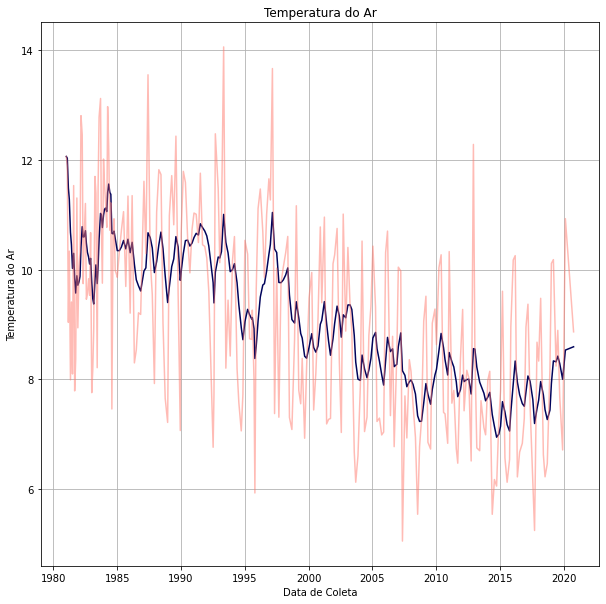

In [41]:
IQADf = pd.DataFrame(list(IQATimeline.items()),columns = ['Data','IQA'])
serieValor = IQADf['IQA'].ewm(span=10, adjust=False).mean()
serieValorRaw = IQADf['IQA']
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(IQADf['Data'], serieValor, c='#00035b')
plt.plot(IQADf['Data'], serieValorRaw, c='#ff796c', alpha=0.5)
plt.title(parameter)
plt.xlabel("Data de Coleta")
plt.ylabel(parameter)